In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [3]:
dir_path = '/home/shiva/Datasets/V2_01_easy/V2_01_easy/'

In [4]:
!ls $dir_path

home_office_3_400p	 mav0_office_working5
home_office_4_720p	 mav0_virtana_office_working_2
home_office_working_2	 mav0_virtana_office_working_3
ImuParams.yaml		 output_logs
Kimera_VIO_Output	 PARAMS_Custom
LeftCameraParams.yaml	 PARAMS_Euroc
mav0			 RightCameraParams.yaml
mav0_euroc		 Timestamp_Checks_Manipulation.ipynb
mav0_office_new_working  virtana_office_working_1
mav0_office_NEW-working


In [19]:
dir_name = 'mav0_office_new_working'

In [20]:
num_rows_to_skip = 50

In [21]:
imu_df = pd.read_csv(f'{dir_path}{dir_name}/imu0/data.csv',skiprows=[1, num_rows_to_skip+1])
cam_df = pd.read_csv(f'{dir_path}{dir_name}/cam0/data.csv',skiprows=[1, num_rows_to_skip+1])

In [22]:
cam_df

,#timestamp [ns],filename
0,1725476851102471168,1725476851102471168.png
1,1725476851227473920,1725476851227473920.png
2,1725476851352473856,1725476851352473856.png
3,1725476851477474048,1725476851477474048.png
4,1725476851602473984,1725476851602473984.png
...,...,...
586,1725476924487561984,1725476924487561984.png
587,1725476924612653056,1725476924612653056.png
588,1725476924737747968,1725476924737747968.png
589,1725476924862838016,1725476924862838016.png


In [23]:
nearest_imu_ts = []

for cam_ts in cam_df['#timestamp [ns]']:
    nearest_imu_ts.append(find_nearest(imu_df['#timestamp [ns]'].values, cam_ts))

In [24]:
delta_df = pd.DataFrame({'nearest_imu_ts':nearest_imu_ts, '#timestamp [ns]':cam_df['#timestamp [ns]']})

In [25]:
delta_df['imu_cam_delta'] = np.abs(delta_df['#timestamp [ns]'] - delta_df['nearest_imu_ts'])/1000000

In [26]:
delta_df['imu_cam_delta'].describe()

count    591.000000
mean       2.636509
std        3.747948
min        0.005120
25%        1.257856
50%        2.401280
75%        3.728256
max       86.634752
Name: imu_cam_delta, dtype: float64

<Axes: xlabel='#timestamp [ns]', ylabel='imu_cam_delta'>

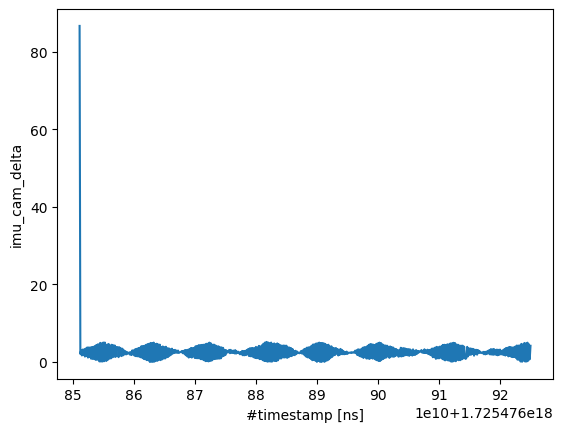

In [27]:
sns.lineplot(data=delta_df, x='#timestamp [ns]', y='imu_cam_delta')